<html>
  <body>
    <h1>Health Care diabetes Prediction</h1>
  
  </body>
</html>

<html>
  <body>
    <h1>Problem Statement</h1>
    <p>Our goal is to predict whether a patient has diabetes or not.</p>
  
  </body>
</html>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [ ]:
data = pd.read_excel('/content/health care diabetes.xlsx')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [ ]:
# value count of Outcome
data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Outcome')

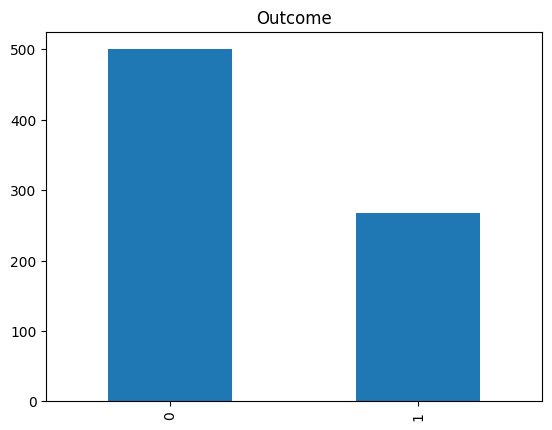

In [ ]:
# visualize value_count of Outcome Variabele
data['Outcome'].value_counts().plot(kind='bar').set_title('Outcome')

In [ ]:
# checking the shape
data.shape

(768, 9)

In [ ]:
# checking for null values
data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

In [ ]:
# Checking the data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# checking for outliers
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking for skewness
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<Axes: >

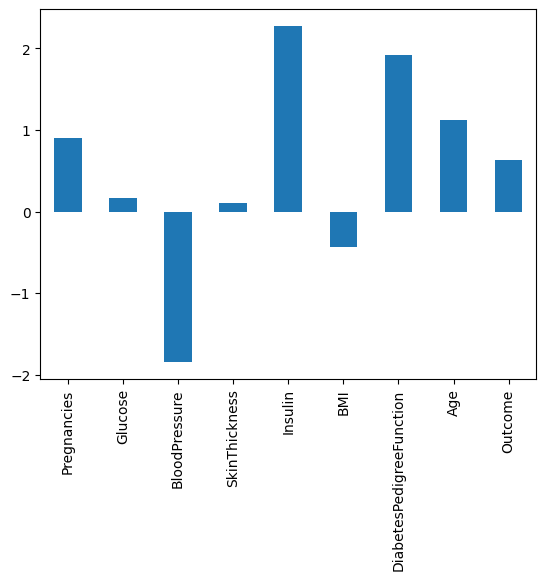

In [ ]:
# plot for skewness
data.skew().plot(kind='bar')

In [ ]:
# checking for kurtosis
data.kurt()


Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

<Axes: >

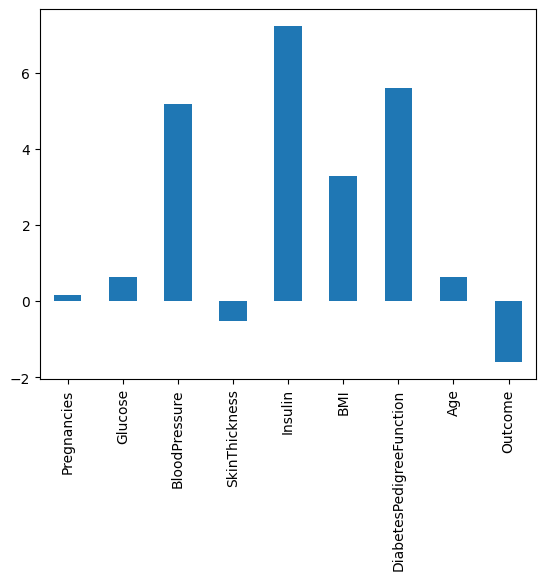

In [ ]:
# plot for kurtosis
data.kurt().plot(kind='bar')

In [ ]:
# checking for correlation
data.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Pregnancies                    Axes(0.125,0.747241;0.133621x0.132759)
Glucose                     Axes(0.285345,0.747241;0.133621x0.132759)
BloodPressure                Axes(0.44569,0.747241;0.133621x0.132759)
SkinThickness               Axes(0.606034,0.747241;0.133621x0.132759)
Insulin                     Axes(0.766379,0.747241;0.133621x0.132759)
BMI                            Axes(0.125,0.587931;0.133621x0.132759)
DiabetesPedigreeFunction    Axes(0.285345,0.587931;0.133621x0.132759)
Age                          Axes(0.44569,0.587931;0.133621x0.132759)
Outcome                     Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

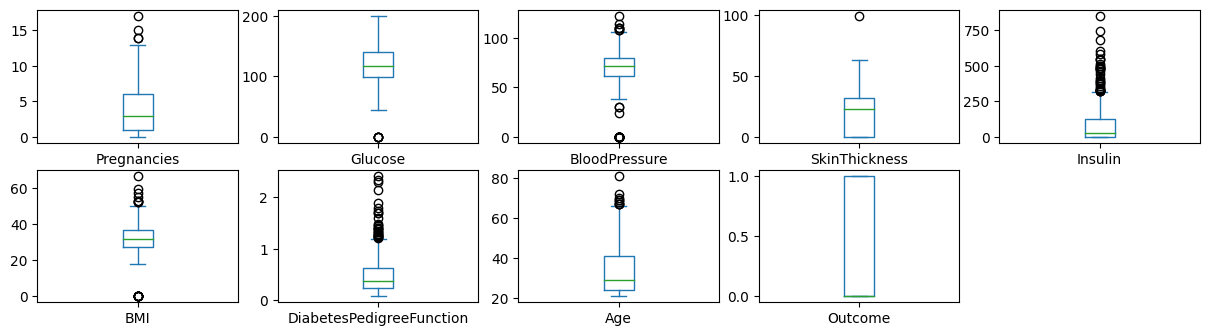

In [ ]:
# Plot boxplot for outliers
data.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,10))

# Feature selection

<Axes: >

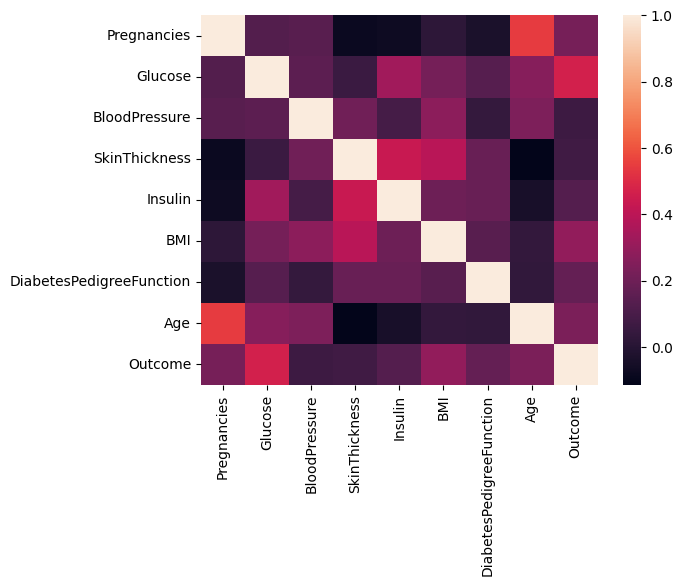

In [ ]:
# Plotting heatmap
sns.heatmap(data.corr())

In [ ]:
from re import X
# select features based on correlation
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# change data type
X['BMI'] = X['BMI'].astype(int)
X['DiabetesPedigreeFunction'] = X['DiabetesPedigreeFunction'].astype(int)

In [ ]:
X.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
dtype: object

# Feature scaling


In [ ]:
# Apply standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
y = y.to_numpy()
y = y.reshape(-1, 1)
y = sc.fit_transform(y)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# print shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

# Model Building

**Creating Model 1**

In [ ]:
# import logistic regression
from sklearn.linear_model import LogisticRegression


In [ ]:
# instantiate the model
model1 = LogisticRegression()

In [ ]:
# fit the model
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# predict
y_pred = model1.predict(X_test)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
Acc = accuracy_score(y_test, y_pred)



In [ ]:
print("Accuracy of model1 is : ",round(Acc  * 100),"%")

Accuracy of model1 is :  81 %


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[97 10]
 [19 28]]


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



**Creating Model 2**

In [ ]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# instantiate the model
model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [ ]:
# fit the model
model2.fit(X_train, y_train)

<ipython-input-36-8ef2ea8a0b66>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
# predict
y_pred2 = model2.predict(X_test)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
Acc2 = accuracy_score(y_test, y_pred2)

In [ ]:
# print accuracy
print("Accuracy of model2 is : ",round(Acc2 * 100),"%")

Accuracy of model2 is :  82 %


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)


In [ ]:
# print confusion matrix
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[94 13]
 [15 32]]


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       107
         1.0       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



**Creating Model 3**

In [ ]:
# Importing Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
# instantiate the model
model3 = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
# fit the model
model3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [ ]:
# predict
y_pred3 = model3.predict(X_test)


In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
Acc3 = accuracy_score(y_test, y_pred3)


In [ ]:
# print accuracy
print("Accuracy of model3 is : ",round(Acc3  * 100),"%")

Accuracy of model3 is :  80 %


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)

In [ ]:
# print confusion matrix
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[96 11]
 [20 27]]


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       107
         1.0       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



**Creating Model 4**

In [ ]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# instantiate the model
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
# fit the model
model4.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# predict
y_pred4 = model4.predict(X_test)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
Acc4 = accuracy_score(y_test, y_pred4)

In [ ]:
# print accuracy
print("Accuracy of model4 is : ",round(Acc4  * 100),"%")

Accuracy of model4 is :  77 %


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred4)


In [ ]:
# print confusion matrix
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[90 17]
 [18 29]]


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       107
         1.0       0.63      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



# Compare all models

In [ ]:
# compare all models
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy' : [Acc, Acc2, Acc3, Acc4],

})

In [ ]:
models.head()

,Model,Accuracy
0,Logistic Regression,0.811688
1,Random Forest,0.818182
2,SVM,0.798701
3,KNN,0.772727


<Axes: xlabel='Model', ylabel='Accuracy'>

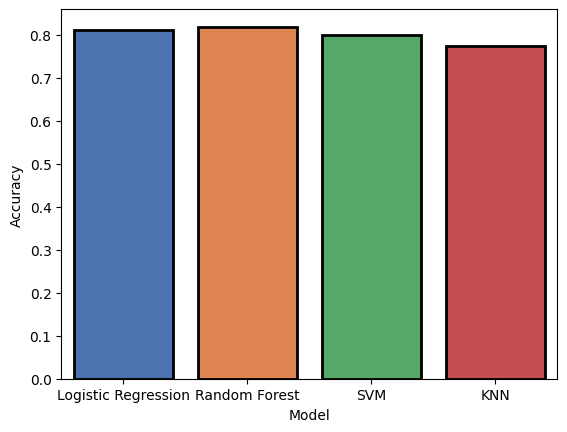

In [ ]:
# visualize models accuracy
sns.barplot(x=models['Model'], y=models['Accuracy'], palette='deep', saturation=1, dodge=False, edgecolor='black', linewidth=2)



### **Since Random Forest has highest accuracy, we will Apply Hyperparameter Tuning on Random Forest Classifier to get best accuracy and f1 score**

# Hyperparameter Tuning

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


In [ ]:
# set parameters for RandomForest
param_grid = {
    'n_estimators' : [50, 100, 150, 200,250,300],
    'max_depth' : [5, 10, 15, 20, 25, 30],
    'random_state' : [0,42],
}

In [ ]:
# instantiate GridSearchCV
final_model = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)


In [ ]:
# fit
final_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [0, 42]})

In [ ]:
# print best parameters
print(final_model.best_params_)

NameError: name 'final_model' is not defined

In [ ]:
# print best score
print(final_model.best_score_)

0.7574037051845928


In [ ]:
# predict
y_pred5 = final_model.predict(X_test)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
Acc5 = accuracy_score(y_test, y_pred5)

In [ ]:
# print accuracy
print("Accuracy of model5 is : ",round(Acc5 * 100),"%")

Accuracy of model5 is :  81 %


In [ ]:
# save the Best model as Random forest Classifier

